# **UNET**

In [ ]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation, Reshape, Input, UpSampling2D, concatenate
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.metrics import mean_squared_error as mse, mean_absolute_error as mae
import matplotlib.pyplot as plt
from osgeo import gdal
import os
from keras.callbacks import EarlyStopping
from tempfile import TemporaryFile
import cv2

# from google.colab import drive
# drive.mount('/content/drive')

file = TemporaryFile()


In [ ]:

# feature_dir = "drive/MyDrive/Dataset3/himawari/2020/10/20/03"
# bands = ['B09B', 'B10B', 'B11B', 'B12B','B14B','B16B','I2B','I4B','IRB','WVB']

# himawari_stacked = []
# # direct = result.toString()
# for i in range(len(list_himawari)):
#   res = []
#   stacked = []
#   for path in os.listdir(list_himawari[i]):
#       for band in bands:
#         splitt = list_himawari[i].split("/")
#         image_path = str(list_himawari[i]) + '/' + 'hima' + '_202010' + splitt[6] + "_" + str(band) + "_" + splitt[7] + ".tif"
#         image = gdal.Open(image_path)
#         # print(image_path)
#         band_image = image.GetRasterBand(1).ReadAsArray()
#         band_image = cv2.resize(src=band_image, dsize=(256, 256))
#         res.append(band_image)
#   stacked = np.dstack(res)

#   himawari_stacked.append(stacked)

# stacked = np.dstack(res)


(512, 512)


# **Xử lý dữ liệu**

In [ ]:
# Divide to join
path = "drive/MyDrive/Colab Notebooks/Dataset3/"
# 7 kinds of data
datas = ['himawari','CAPE','ISOR','TCC','TCW','TCWV']
month = '/2020/10'
days = ['06','07','08','09','10','15', '16', '17', '18', '19', '20']
#Data Himawari và Radar thiếu dữ liệu lúc 8 giờ ngày 20
hours = ['00','01','02','03','04','05','06','07','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
#Himawari band
bands = ['B09B', 'B10B', 'B11B', 'B12B','B14B','B16B','I2B','I4B','IRB','WVB']

X_data = []
#Data Reading
for day in days:
    for hour in hours:
        # List image
        data_image = []
        for data in datas:
            if data == 'himawari':
                for band in bands:
                    image_path = path + data + month +"/"+ str(day) + "/" + str(hour) +'/'+ "hima" + "_202010" + str(day) + "_" + band + "_" + str(hour) + ".tif"
                    print(image_path)
                    # print(image_path.shape)
                    image = gdal.Open(image_path)
                    image_data = image.GetRasterBand(1).ReadAsArray()
                    # Resize 
                    image_data = cv2.resize(src=image_data, dsize=(256, 256))
                    data_image.append(image_data)
            else:
                image_path = path + data + month +"/"+ str(day) + "/" + str(hour) +'/'+ data + "_202010" + str(day) + "_" + str(hour) + ".tif"
                image = gdal.Open(image_path)
                image_data = image.GetRasterBand(1).ReadAsArray()
                # Resize
                image_data = cv2.resize(src=image_data, dsize=(256, 256))
                data_image.append(image_data)
        # Chồng 15 ảnh từ 6 loại dữ liệu
        stacked = np.dstack(data_image)
        # Nối vào list data
        X_data.append(stacked)
  
# print(X_data)

X = np.stack(X_data)

print(X.shape)


drive/MyDrive/Colab Notebooks/Dataset3/himawari/2020/10/06/00/hima_20201006_B09B_00.tif
drive/MyDrive/Colab Notebooks/Dataset3/himawari/2020/10/06/00/hima_20201006_B10B_00.tif
drive/MyDrive/Colab Notebooks/Dataset3/himawari/2020/10/06/00/hima_20201006_B11B_00.tif
drive/MyDrive/Colab Notebooks/Dataset3/himawari/2020/10/06/00/hima_20201006_B12B_00.tif
drive/MyDrive/Colab Notebooks/Dataset3/himawari/2020/10/06/00/hima_20201006_B14B_00.tif
drive/MyDrive/Colab Notebooks/Dataset3/himawari/2020/10/06/00/hima_20201006_B16B_00.tif
drive/MyDrive/Colab Notebooks/Dataset3/himawari/2020/10/06/00/hima_20201006_I2B_00.tif
drive/MyDrive/Colab Notebooks/Dataset3/himawari/2020/10/06/00/hima_20201006_I4B_00.tif
drive/MyDrive/Colab Notebooks/Dataset3/himawari/2020/10/06/00/hima_20201006_IRB_00.tif
drive/MyDrive/Colab Notebooks/Dataset3/himawari/2020/10/06/00/hima_20201006_WVB_00.tif
drive/MyDrive/Colab Notebooks/Dataset3/himawari/2020/10/06/01/hima_20201006_B09B_01.tif
drive/MyDrive/Colab Notebooks/Datase

In [ ]:
#Target Data

y_data = []
for day in days:
    for hour in hours:
        image_path = path + 'radar' + month + '/' + str(day) + '/' + str(hour) + '/' + 'radar' + "_202010" + str(day) + "_" + str(hour) + ".tif"
        print(image_path)

        image = gdal.Open(image_path)
        path_output = path + 'radar' + month + '/' + str(day) + '/' + str(hour) + '/' + 'radar' + "_202010" + str(day) + "_" + str(hour) + ".png"
        
        img_2 = gdal.Translate(path_output, image_path, outputType=gdal.GDT_Byte, scaleParams=[[0, 1]])
        image_data = img_2.GetRasterBand(1).ReadAsArray()
        # image_data = image.GetRasterBand(1).ReadAsArray()
        #Resize
        img_resized = cv2.resize(src=image_data, dsize=(256, 256))
        y_data.append(img_resized)
        # Y_data.append(image_data)

y = np.stack(y_data)

print(y.shape)

print(image_path)
print(image_data)
print(img_resized)

drive/MyDrive/Colab Notebooks/Dataset3/radar/2020/10/06/00/radar_20201006_00.tif
drive/MyDrive/Colab Notebooks/Dataset3/radar/2020/10/06/01/radar_20201006_01.tif
drive/MyDrive/Colab Notebooks/Dataset3/radar/2020/10/06/02/radar_20201006_02.tif
drive/MyDrive/Colab Notebooks/Dataset3/radar/2020/10/06/03/radar_20201006_03.tif
drive/MyDrive/Colab Notebooks/Dataset3/radar/2020/10/06/04/radar_20201006_04.tif
drive/MyDrive/Colab Notebooks/Dataset3/radar/2020/10/06/05/radar_20201006_05.tif
drive/MyDrive/Colab Notebooks/Dataset3/radar/2020/10/06/06/radar_20201006_06.tif
drive/MyDrive/Colab Notebooks/Dataset3/radar/2020/10/06/07/radar_20201006_07.tif
drive/MyDrive/Colab Notebooks/Dataset3/radar/2020/10/06/09/radar_20201006_09.tif
drive/MyDrive/Colab Notebooks/Dataset3/radar/2020/10/06/10/radar_20201006_10.tif
drive/MyDrive/Colab Notebooks/Dataset3/radar/2020/10/06/11/radar_20201006_11.tif
drive/MyDrive/Colab Notebooks/Dataset3/radar/2020/10/06/12/radar_20201006_12.tif
drive/MyDrive/Colab Notebook

In [ ]:
# Data sau lần chạy đầu thì được lưu vào file rồi đọc thay vì phải chạy đọc ảnh nhiều lần tốn thời gian
np.save('/content/drive/MyDrive/Colab Notebooks/DataReading/X', X)
np.save('/content/drive/MyDrive/Colab Notebooks/DataReading/Y', y)


In [ ]:
# Đọc dữ liệu từ file đã lưu
X=np.load('/content/drive/MyDrive/Colab Notebooks/DataReading/X.npy')
y=np.load('/content/drive/MyDrive/Colab Notebooks/DataReading/Y.npy')

(253, 256, 256, 15)
(253, 256, 256)

Train:
(177, 256, 256, 15)
(177, 256, 256)

Validate:
(50, 256, 256, 15)
(50, 256, 256)

Test:
(26, 256, 256, 15)
(26, 256, 256)



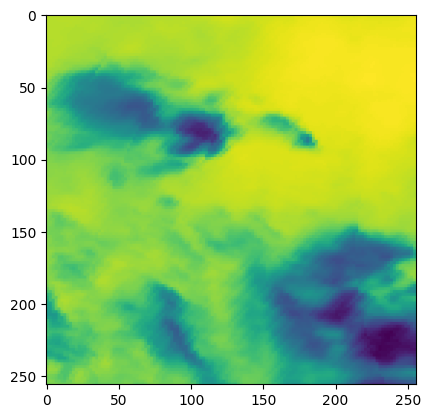

In [ ]:
# Shape X, y
print(X.shape)
print(y.shape)
print()
#Divide train/validate: 70/20/10
size = int(X.shape[0] * 0.7)

X_train = X[:size]
y_train = y[:size]

X_val = X[size: size + int(X.shape[0] * 0.2)]
y_val = y[size: size + int(X.shape[0] * 0.2)]

X_test = X[size + int(X.shape[0] * 0.2) :]
y_test = y[size + int(X.shape[0] * 0.2) :]
print('Train:')
print(X_train.shape)
print(y_train.shape)
print()

print('Validate:')
print(X_val.shape)
print(y_val.shape)
print()

print('Test:')
print(X_test.shape)
print(y_test.shape)
print()

#Test data X and y
plt.imshow(X[0, :, :, 1])

# plt.imshow(y[0, :, :])
# plt.imshow(X[10, :, :, 12])



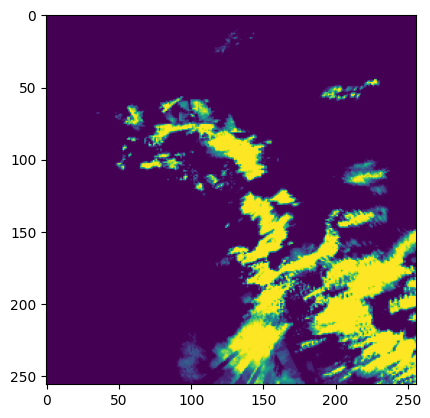

In [ ]:
# Test radar data
plt.imshow(y[5, :, :])

# **Mô hình UNET**

In [ ]:
# Khởi tạo mô hình UNET
inputs = Input((256, 256, 15))

# conv1 = Conv2D(filters=32, kernel_size=3, activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
# conv1 = Conv2D(filters=32, kernel_size=3, activation='relu', kernel_initializer='he_normal', padding='same')(conv1)
# pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(filters=64, kernel_size=3, activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
conv2 = Conv2D(filters=64, kernel_size=3, activation='relu', kernel_initializer='he_normal', padding='same')(conv2)
conv2 = Dropout(0.25)(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
conv3 = Conv2D(filters=128, kernel_size=3, activation='relu', kernel_initializer='he_normal', padding='same')(pool2)
conv3 = Conv2D(filters=128, kernel_size=3, activation='relu', kernel_initializer='he_normal', padding='same')(conv3)
conv3 = Dropout(0.2)(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    
conv4 = Conv2D(filters=256, kernel_size=3, activation='relu', kernel_initializer='he_normal', padding='same')(pool3)
conv4 = Conv2D(filters=256, kernel_size=3, activation='relu', kernel_initializer='he_normal', padding='same')(conv4)
# conv4 = Dropout(0.2)(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    
conv5 = Conv2D(filters=512, kernel_size=3, activation='relu', kernel_initializer='he_normal', padding='same')(pool4)
conv5 = Conv2D(filters=512, kernel_size=3, activation='relu', kernel_initializer='he_normal', padding='same')(conv5)
conv5 = Dropout(0.5)(conv5)
pool5 = MaxPooling2D(pool_size=(2, 2))(conv5)
    
conv6 = Conv2D(filters=1024, kernel_size=3, activation='relu', kernel_initializer='he_normal', padding='same')(pool5)
conv6 = Conv2D(filters=1024, kernel_size=3, activation='relu', kernel_initializer='he_normal', padding='same')(conv6)
conv6 = Dropout(0.5)(conv6)
    
up7 = Conv2D(filters=512, kernel_size=2, activation='relu', kernel_initializer='he_normal', padding='same')(UpSampling2D(size=(2,2))(conv6))
up7 = concatenate([conv5,up7], axis=3)
conv7 = Conv2D(filters=512, kernel_size=3, activation='relu', kernel_initializer='he_normal', padding='same')(up7)
conv7 = Conv2D(filters=512, kernel_size=3, activation='relu', kernel_initializer='he_normal', padding='same')(conv7)
# conv7 = Dropout(0.2)(conv7)
    
up8 = Conv2D(filters=256, kernel_size=2, activation='relu', kernel_initializer='he_normal', padding='same')(UpSampling2D(size=(2,2))(conv7))
up8 = concatenate([conv4,up8], axis=3)
conv8 = Conv2D(filters=256, kernel_size=3, activation='relu', kernel_initializer='he_normal', padding='same')(up8)
conv8 = Conv2D(filters=256, kernel_size=3, activation='relu', kernel_initializer='he_normal', padding='same')(conv8)



up9 = Conv2D(filters=128, kernel_size=2, activation='relu', kernel_initializer='he_normal', padding='same')(UpSampling2D(size=(2,2))(conv8))
up9 = concatenate([conv3,up9], axis=3)
conv9 = Conv2D(filters=128, kernel_size=3, activation='relu', kernel_initializer='he_normal', padding='same')(up9)

conv9 = Conv2D(filters=128, kernel_size=3, activation='relu', kernel_initializer='he_normal', padding='same')(conv9)

    
up10 = Conv2D(filters=64, kernel_size=2, activation='relu', kernel_initializer='he_normal', padding='same')(UpSampling2D(size=(2,2))(conv9))
up10 = concatenate([conv2,up10], axis=3)
conv10 = Conv2D(filters=64, kernel_size=3, activation='relu', kernel_initializer='he_normal', padding='same')(up10)
conv10 = Conv2D(filters=64, kernel_size=3, activation='relu', kernel_initializer='he_normal', padding='same')(conv10)
# conv10 = Dropout(0.25)(conv10)

# up11 = Conv2D(filters=32, kernel_size=2, activation='relu', kernel_initializer='he_normal', padding='same')(UpSampling2D(size=(2,2))(conv10))
# up11 = concatenate([conv1,up11], axis=3)
# conv11 = Conv2D(filters=32, kernel_size=3, activation='relu', kernel_initializer='he_normal', padding='same')(up11)
# # conv11 = Dropout(0.5)(conv11)
# conv11 = Conv2D(filters=32, kernel_size=3, activation='relu', kernel_initializer='he_normal', padding='same')(conv11)
conv10 = Conv2D(2, kernel_size=3, activation='relu', kernel_initializer='he_normal', padding='same')(conv10)

#Output
outputs = Conv2D(filters=1, kernel_size=(1, 1), activation='linear')(conv10)


    
unet_model = Model(inputs=inputs, outputs=outputs)
    

In [ ]:
unet_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                5)]                                                               
                                                                                                  
 conv2d_96 (Conv2D)             (None, 256, 256, 64  8704        ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_97 (Conv2D)             (None, 256, 256, 64  36928       ['conv2d_96[0][0]']              
                                )                                                           

In [ ]:
unet_model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse', metrics='accuracy')

#EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1, restore_best_weights=True)

#Fit the model
history = unet_model.fit(X_train, y_train, epochs = 50, batch_size = 2, 
                    validation_data = (X_val, y_val), callbacks=[early_stop])

Epoch 1/50
89/89 [==============================] - 22s 226ms/step - loss: 10535.7129 - accuracy: 0.6253 - val_loss: 10203.0664 - val_accuracy: 0.3543
Epoch 2/50
89/89 [==============================] - 20s 224ms/step - loss: 6342.4448 - accuracy: 0.5630 - val_loss: 9931.4072 - val_accuracy: 0.4035
Epoch 3/50
89/89 [==============================] - 19s 209ms/step - loss: 5539.2153 - accuracy: 0.5506 - val_loss: 9619.0645 - val_accuracy: 0.2997
Epoch 4/50
89/89 [==============================] - 19s 211ms/step - loss: 5371.9839 - accuracy: 0.5468 - val_loss: 8957.2305 - val_accuracy: 0.2353
Epoch 5/50
89/89 [==============================] - 20s 223ms/step - loss: 5323.6372 - accuracy: 0.5363 - val_loss: 9052.3242 - val_accuracy: 0.2395
Epoch 6/50
89/89 [==============================] - 19s 209ms/step - loss: 4980.6260 - accuracy: 0.5353 - val_loss: 9263.4893 - val_accuracy: 0.1829
Epoch 6: early stopping


In [ ]:
#Predict
y_pred = unet_model.predict(X_test)
# Đánh giá model với dữ liệu test set
score = unet_model.evaluate(X_test, y_test, verbose = 1)
print(score)

1/1 [==============================] - 1s 903ms/step - loss: 3560.6082 - accuracy: 0.6168
[3560.608154296875, 0.6167872548103333]


In [ ]:
print('Test Accuracy:', score[1])
# print('Test MSE:', score[0])

Test Accuracy: 0.6167872548103333


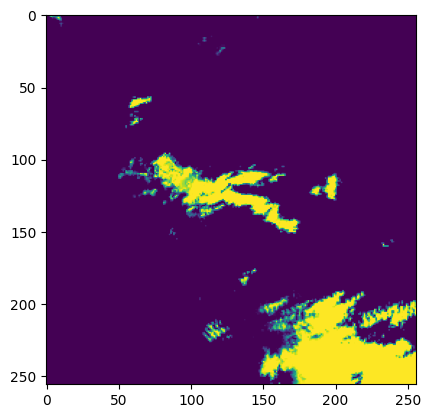

In [ ]:
# Test 
plt.imshow(y[10])

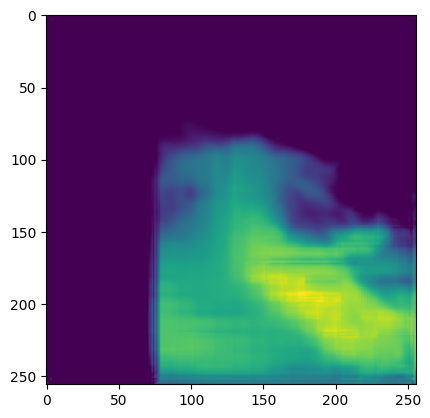

In [ ]:

plt.imshow(y_pred[10])


<ipython-input-74-ae0ea8fcedcf>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  graph = plt.subplot(subplot)


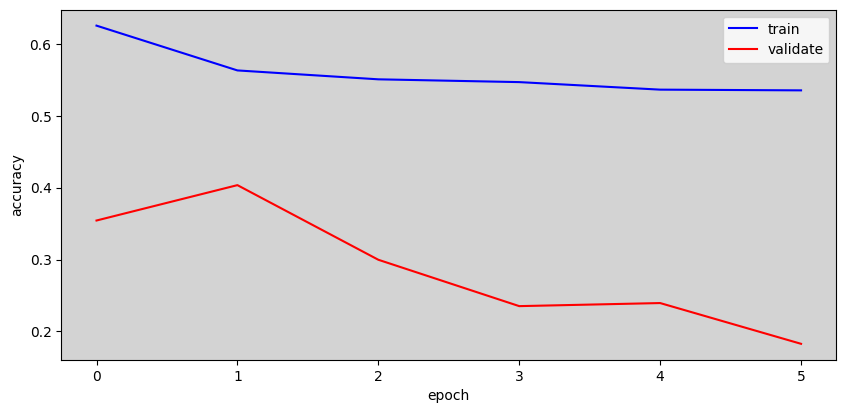

In [ ]:
#Graph
def visualization(train, val, subplot, loss):
  graph = plt.subplot(subplot)
  graph.plot(train, color='blue')
  graph.plot(val, color='red')
  graph.legend(['train', 'validate'])
  graph.set_xlabel('epoch')
  graph.set_ylabel(loss)
  graph.set_facecolor('lightgray')

#plt.subplots(figsize=(15,15))
plt.subplots(figsize=(10,10))
# Model
visualization(history.history['accuracy'], history.history['val_accuracy'], 211, 'accuracy')

# visualization(history.history['loss'], history.history['val_loss'], 212, 'mse')